In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Mall_Customers - Mall_Customers.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


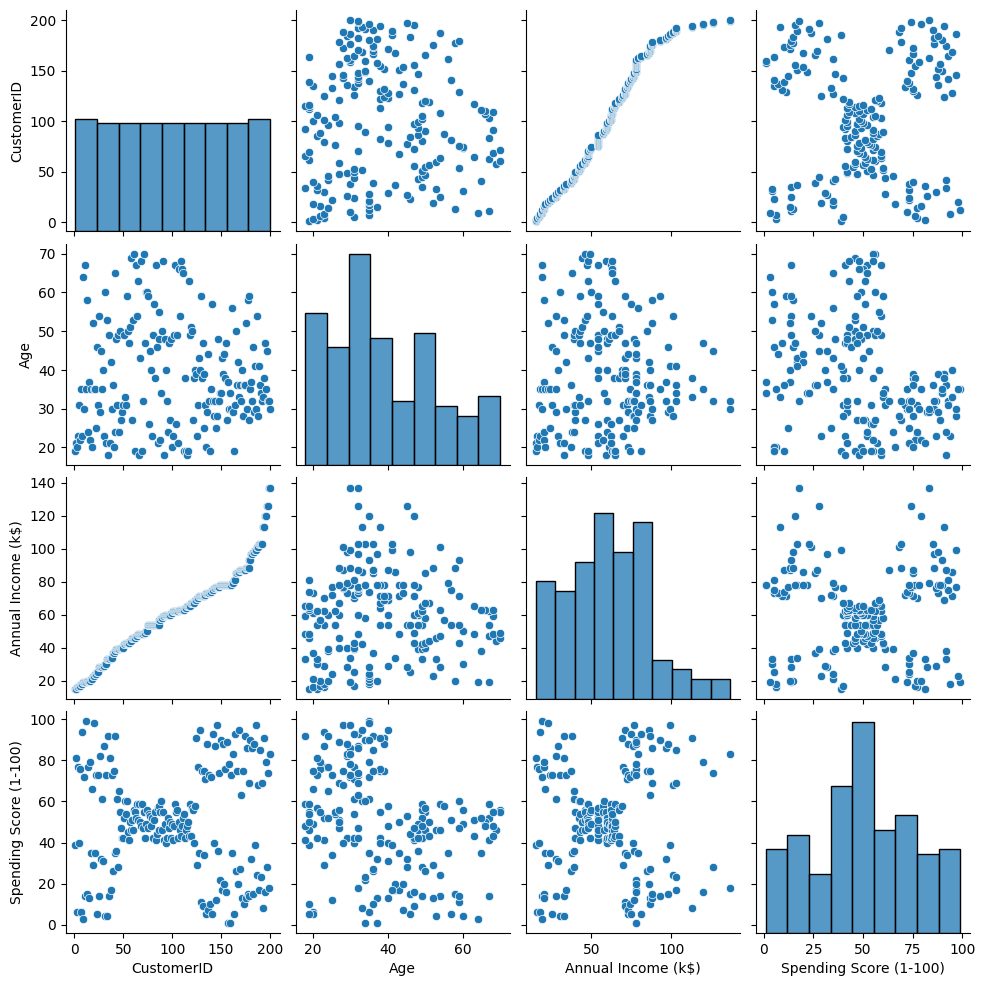

In [7]:
sns.pairplot(df)

In [8]:
features=df.iloc[:,[3,4]].values

In [9]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit(features)
KMeans(n_clusters=5)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [11]:
Final=df.iloc[:,[3,4]].copy()
Final['label']=model.predict(features)
Final.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


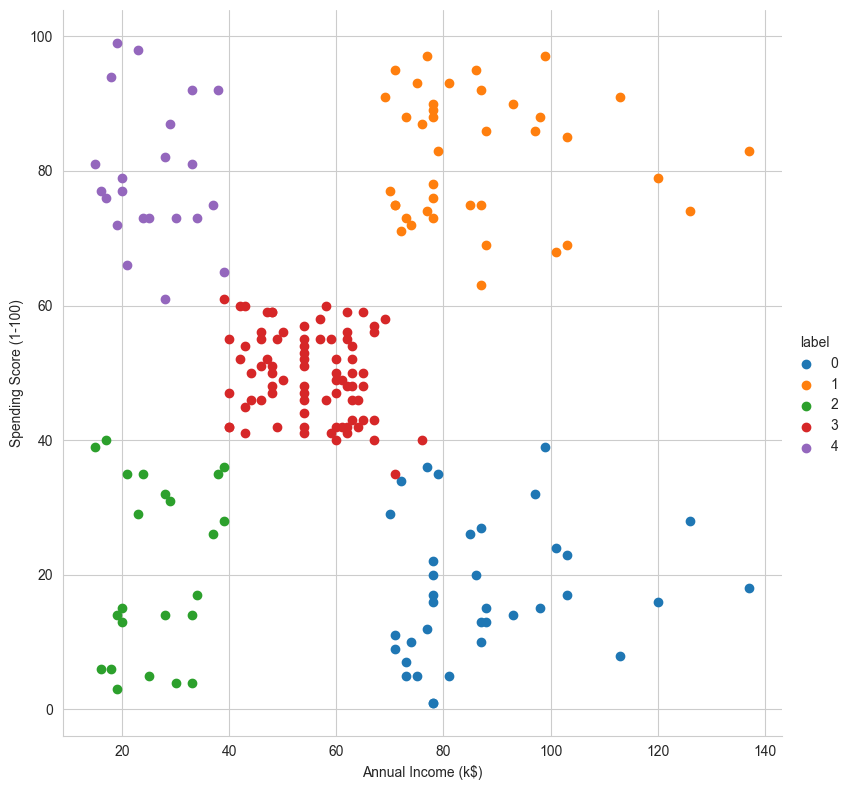

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(Final,hue="label",height=8) \
.map(plt.scatter,"Annual Income (k$)", "Spending Score (1-100)") \
.add_legend();
plt.show()

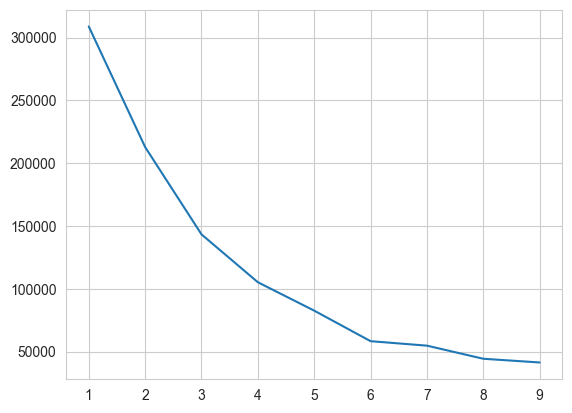

In [14]:
features_el=df.iloc[:,[2,3,4]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(features_el)
    wcss.append(model.inertia_)
plt.plot(range(1,10),wcss)